https://www.kaggle.com/code/parulpandey/visualizing-kannada-mnist-with-t-sne/notebook

In [2]:
from time import time
import numpy as np
import pandas as pd
from matplotlib import offsetbox
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import seaborn as sns
import plotly.graph_objects as go

sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})

#For standardising the dat
from sklearn.preprocessing import StandardScaler

#PCA
from sklearn.manifold import TSNE

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [3]:
train = pd.read_csv(r"C:\Birla\Sem_2\TCS\ML\IA-2\Kanada_Datasets\train.csv")
test = pd.read_csv(r"C:\Birla\Sem_2\TCS\ML\IA-2\Kanada_Datasets\test.csv")

In [4]:
y = train.loc[:,'label'].values
x = train.loc[:,'pixel0':].values

print(x.shape)
print(y)

(60000, 784)
[0 1 2 ... 7 8 9]


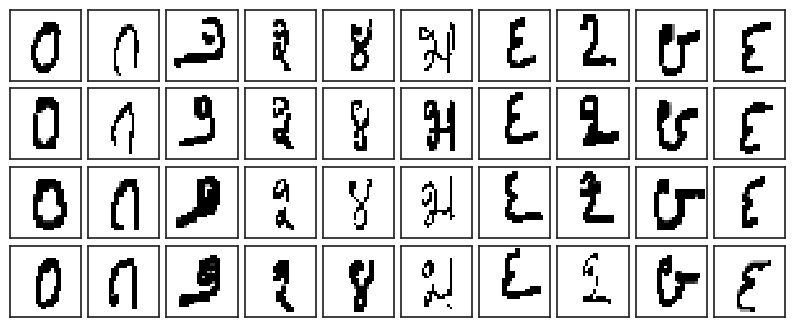

In [5]:
## Plotting the original train data

def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(28, 28),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(x)

In [6]:
## Standardizing the data
standardized_data = StandardScaler().fit_transform(x)
print(standardized_data.shape)

(60000, 784)


In [7]:
# t-SNE is consumes a lot of memory so we shall use only a subset of our dataset. 

x_subset = x[0:10000]
y_subset = y[0:10000]

print(np.unique(y_subset))

[0 1 2 3 4 5 6 7 8 9]


In [8]:
# Applyting t-SNE on the data
%time
tsne = TSNE(random_state = 42, n_components=2,verbose=0, perplexity=40, n_iter=300).fit_transform(x_subset)

CPU times: total: 0 ns
Wall time: 0 ns


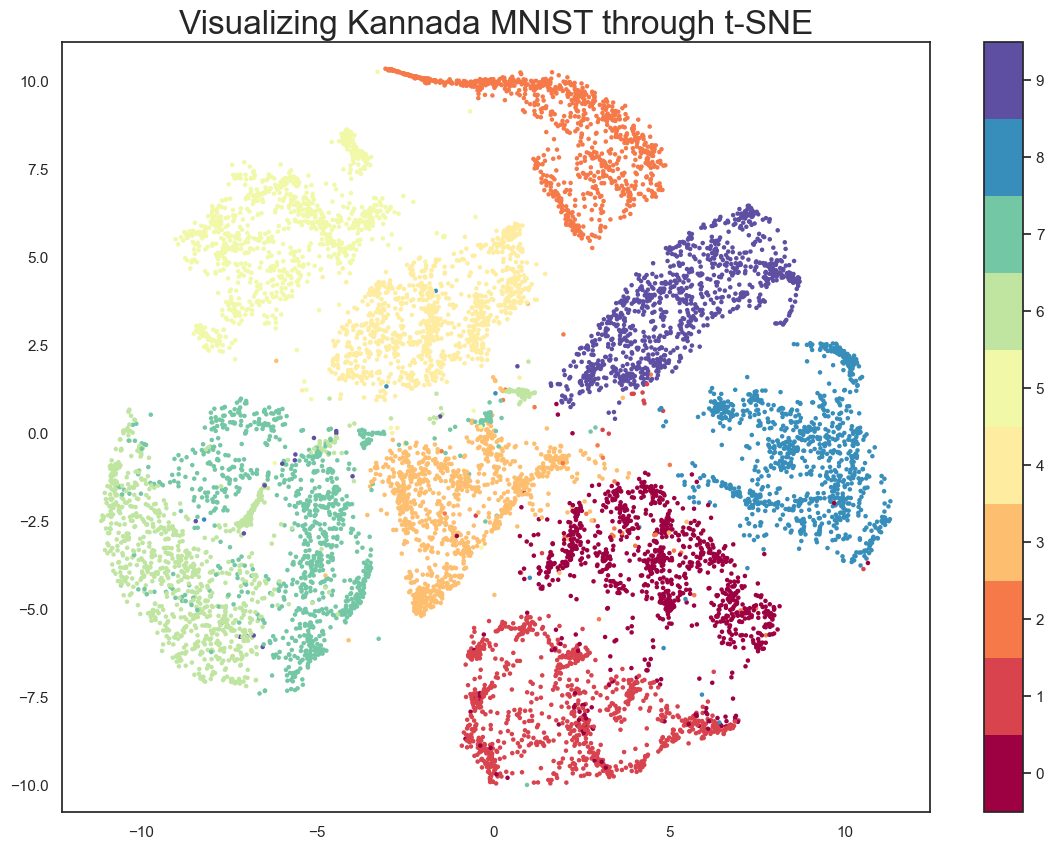

In [9]:
plt.scatter(tsne[:, 0], tsne[:, 1], s= 5, c=y_subset, cmap='Spectral')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('Visualizing Kannada MNIST through t-SNE', fontsize=24);

In [10]:
# Using PCA to reduce dimensions of data before feeding to t-SNE algorithm
from sklearn.decomposition import PCA
pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(x_subset)

In [11]:
# Using the output of PCA as input for t-SNE
%time
pca_tsne = TSNE(random_state = 42, n_components=2, verbose=0, perplexity=40, n_iter=300).fit_transform(pca_result_50)


CPU times: total: 0 ns
Wall time: 0 ns


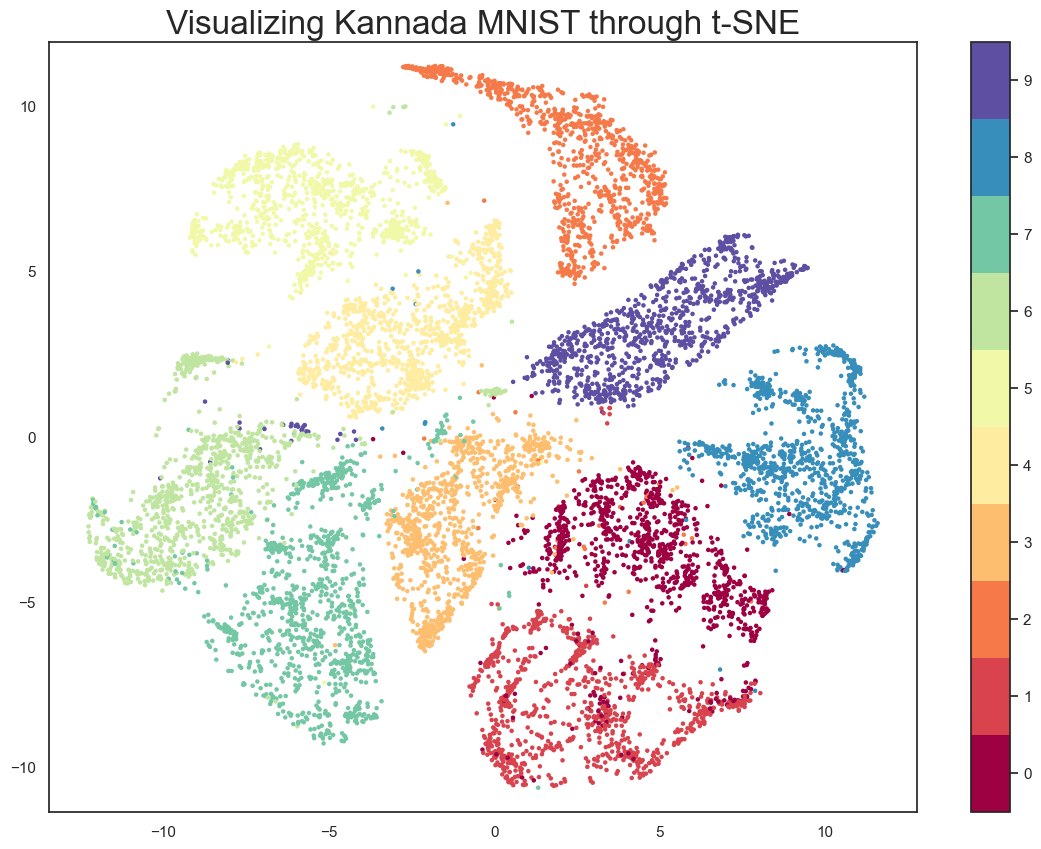

In [12]:
#visualising t-SNE again 

plt.scatter(pca_tsne[:, 0], pca_tsne[:, 1], s= 5, c=y_subset, cmap='Spectral')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('Visualizing Kannada MNIST through t-SNE', fontsize=24);

In [13]:
# Visualizing TSNE in 3D using matplolib
%time
pca_tsne2 = TSNE(random_state = 42, n_components=3, verbose=0, perplexity=40, n_iter=300).fit_transform(pca_result_50)

CPU times: total: 0 ns
Wall time: 0 ns


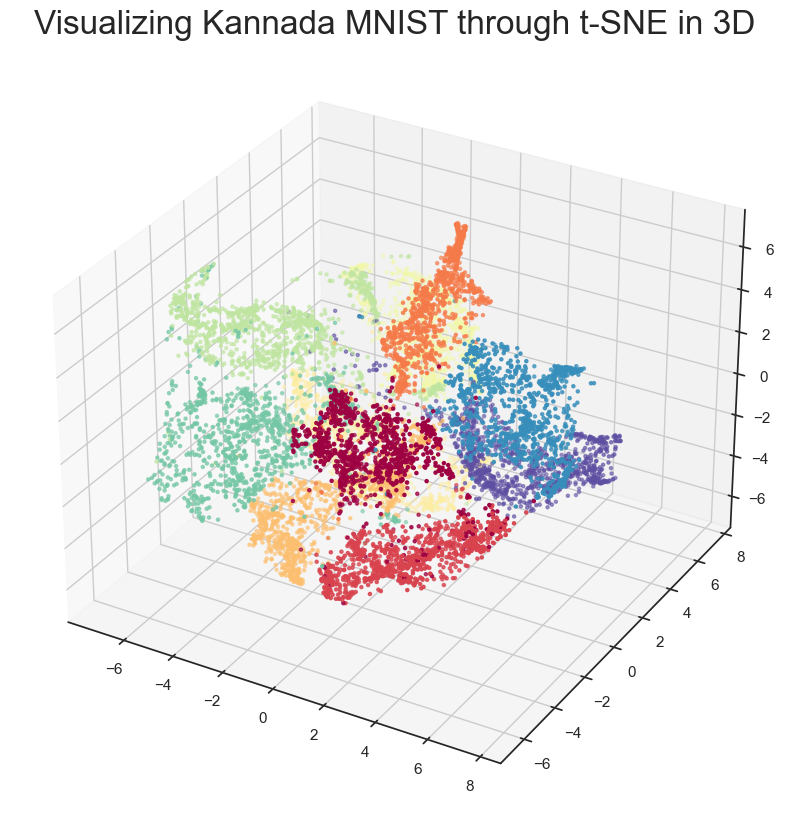

In [14]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(pca_tsne2[:, 0], pca_tsne2[:, 1],pca_tsne2[:,2], s= 5, c=y_subset, cmap='Spectral')
plt.title('Visualizing Kannada MNIST through t-SNE in 3D', fontsize=24);
plt.show()

In [17]:
# Visualization with plotly
x=pca_tsne2[:, 0]
y=pca_tsne2[:, 1]
z=pca_tsne2[:, 2]

fig = go.Figure(data=[go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=12,
        color=x,                # set color to an array/list of desired values
        colorscale='Spectral',   # choose a colorscale
        opacity=0.8
    )
)])

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

In [18]:
x=pca_tsne2[:, 0]
y=pca_tsne2[:, 1]
z=pca_tsne2[:, 2]

fig = go.Figure(data=[go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(size=3, symbol="circle"),
    )
])

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()